# Interactive Sim Setup

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from vivarium import InteractiveContext, Artifact
from pathlib import Path
#import itertools
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = Path('/ihme/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/model_specifications/nih_us_cvd.yaml')
sim = InteractiveContext(path, setup=False)

In [3]:
sim.configuration.update({
                          'population':
                              {'population_size': 50_000,
                              },
                          }
                        )

In [4]:
sim.setup()

2023-08-15 08:07:29.583 | INFO     | simulation_1-artifact_manager:66 - Running simulation from artifact located at /mnt/team/simulation_science/costeffectiveness/artifacts/vivarium_nih_us_cvd/alabama.hdf.
2023-08-15 08:07:29.585 | INFO     | simulation_1-artifact_manager:67 - Artifact base filter terms are ['draw == 0'].
2023-08-15 08:07:29.586 | INFO     | simulation_1-artifact_manager:68 - Artifact additional filter terms are None.


/mnt/share/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/components/treatment.py:689: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbp_prescription_inertia_propensity.loc[
/mnt/share/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/components/treatment.py:776: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_visitors[
/mnt/share/homes/lutzes/vivarium_nih_us_cvd/src/vivarium_nih_us_cvd/components/treatment.py:858: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

In [5]:
pop0 = sim.get_population()
pop0.head()

,tracked,location,entrance_time,alive,age,sex,exit_time,cause_of_death,years_of_life_lost,years_lived_with_disability,...,sbp_multiplier,sbp_medication,lifestyle,polypill,sbp_medication_adherence,ldlc_multiplier,sbp_therapeutic_inertia_propensity,visit_type,last_fpg_test_date,scheduled_date
0,True,Alabama,2020-12-04,alive,47.388882,Female,NaT,not_dead,0.0,0.0,...,1.051,one_drug_half_dose_efficacy,NaT,cat2,cat3,1.0,0.022599,none,NaT,NaT
1,True,Alabama,2020-12-04,alive,41.564194,Male,NaT,not_dead,0.0,0.0,...,1.000,no_treatment,NaT,cat2,cat3,1.0,0.742067,none,NaT,NaT
2,True,Alabama,2020-12-04,alive,53.155826,Female,NaT,not_dead,0.0,0.0,...,1.000,no_treatment,NaT,cat2,cat3,1.0,0.591302,none,NaT,NaT
3,True,Alabama,2020-12-04,alive,30.457692,Male,NaT,not_dead,0.0,0.0,...,1.000,no_treatment,NaT,cat2,cat3,1.0,0.273953,none,NaT,NaT
4,True,Alabama,2020-12-04,alive,19.554806,Female,NaT,not_dead,0.0,0.0,...,1.000,no_treatment,NaT,cat2,cat3,1.0,0.455919,none,NaT,NaT


In [6]:
#pop0.columns

In [7]:
#sim.list_values()

In [8]:
data1 = pd.concat([pop0,
                   sim.get_value('high_ldl_cholesterol.exposure')(pop0.index).rename('high_ldl'),
                   sim.get_value('high_systolic_blood_pressure.exposure')(pop0.index).rename('high_sbp'),
                  ], axis=1)
data1.head()

,tracked,location,entrance_time,alive,age,sex,exit_time,cause_of_death,years_of_life_lost,years_lived_with_disability,...,lifestyle,polypill,sbp_medication_adherence,ldlc_multiplier,sbp_therapeutic_inertia_propensity,visit_type,last_fpg_test_date,scheduled_date,high_ldl,high_sbp
0,True,Alabama,2020-12-04,alive,47.388882,Female,NaT,not_dead,0.0,0.0,...,NaT,cat2,cat3,1.0,0.022599,none,NaT,NaT,2.125019,138.926833
1,True,Alabama,2020-12-04,alive,41.564194,Male,NaT,not_dead,0.0,0.0,...,NaT,cat2,cat3,1.0,0.742067,none,NaT,NaT,2.397553,137.634343
2,True,Alabama,2020-12-04,alive,53.155826,Female,NaT,not_dead,0.0,0.0,...,NaT,cat2,cat3,1.0,0.591302,none,NaT,NaT,2.110561,139.700114
3,True,Alabama,2020-12-04,alive,30.457692,Male,NaT,not_dead,0.0,0.0,...,NaT,cat2,cat3,1.0,0.273953,none,NaT,NaT,2.133673,127.697819
4,True,Alabama,2020-12-04,alive,19.554806,Female,NaT,not_dead,0.0,0.0,...,NaT,cat2,cat3,1.0,0.455919,none,NaT,NaT,0.000000,50.000000


# Analyze Continuous Risks 

Note: for this analysis we do not take any time steps. You can also run the simulation forward and repeat this to ensure risks remain stable over time

### Visualize the Spread of Continuous Risks

<Axes: xlabel='high_ldl', ylabel='Count'>

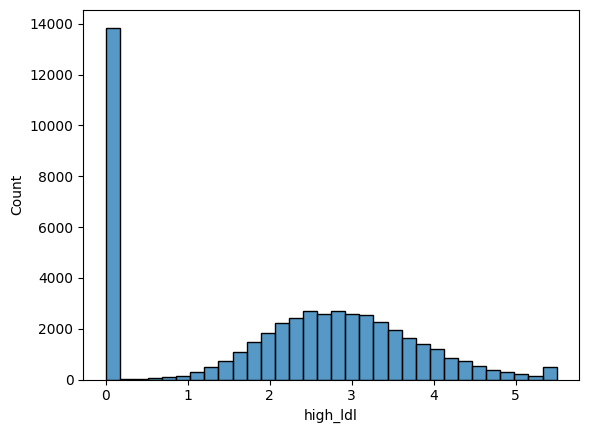

In [9]:
sns.histplot(data1.high_ldl)

<Axes: xlabel='high_ldl', ylabel='Count'>

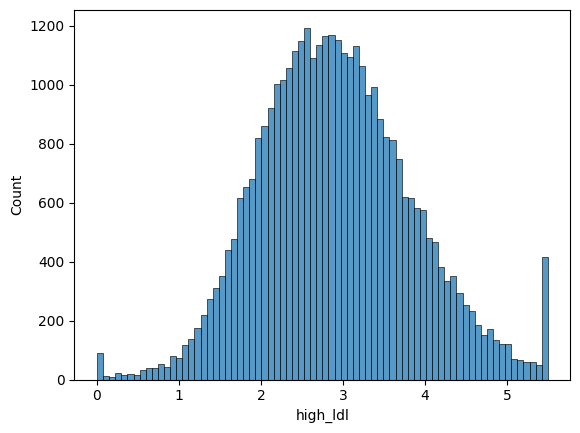

In [10]:
## This is a good example - why do we have a peak at 0? 
## Are we including the right people? In this model anyone under age 25 has fake risk exposure values, 
## we can remove them and run it again. We also limit it to alive people only. 

data1 = data1.loc[(data1.age > 25) & (data1.alive == 'alive')]
sns.histplot(data1.high_ldl)

In [11]:
## THis is looking better now! We have a group at 5.5, but we did that in modeling by setting a max, so this is expected. 
## Let's check on the folks at zero, that's a bit odd 

len(data1.loc[data1.high_ldl == 0]) / len(data1)

0.0020412666887344145

<Axes: xlabel='high_sbp', ylabel='Count'>

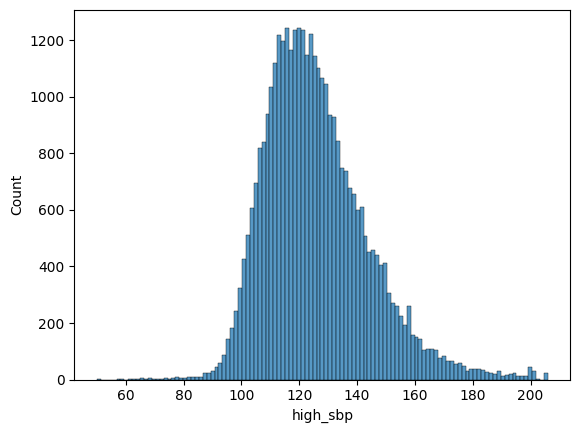

In [12]:
## Relatively few people, so not too concerning. We can repeat this for SBP 

sns.histplot(data1.high_sbp)

In [13]:
## This is looking fine! 
## You can also make these plots for specific age/sex groups to see how they look 

## Continuous Risk Standard Deviation

Generally you output the mean risk values from the main sim, so we don't check that here. 
But we will check standard deviation! 

In [14]:
## First we need to load in the artifact data here

from vivarium import Artifact

def load_artifact_data(word:str, cause:str, measure:str):
    master_art_data = pd.DataFrame()
    for i in ['alabama']: #in case there are other countries
        
        # grab main artifact object
        art = Artifact('/mnt/team/simulation_science/costeffectiveness/artifacts/vivarium_nih_us_cvd/' + i + '.hdf', 
                   filter_terms=['year_start == 2019', 'age_start >=  25']) # << MIGHT WANT TO CHANGE THESE TERMS
        
        # load requested measure
        data = art.load(word + '.' + cause + '.' + measure)
        
        # collapse to desired percentiles
        data = data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.35,0.975], axis=1).filter(['mean','35%', '2.5%', '97.5%']).reset_index()
        
        # formatting (may want to format age as well)
        data['location'] = i.capitalize()
        data['measure'] = measure
    
   
        master_art_data = master_art_data.append(data)
        
    return master_art_data

In [15]:
ldl_exp_std = load_artifact_data('risk_factor', 'high_ldl_cholesterol', 'exposure_standard_deviation')
ldl_exp_std['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(ldl_exp_std.age_start,ldl_exp_std.age_end)]
ldl_exp_std.head()

,sex,age_start,age_end,year_start,year_end,mean,35%,2.5%,97.5%,location,measure,age_group
0,Female,25.0,30.0,2019,2020,0.866901,0.854303,0.810395,0.924996,Alabama,exposure_standard_deviation,25_to_29
1,Female,30.0,35.0,2019,2020,0.834644,0.823973,0.785313,0.885991,Alabama,exposure_standard_deviation,30_to_34
2,Female,35.0,40.0,2019,2020,0.854927,0.845481,0.808928,0.901343,Alabama,exposure_standard_deviation,35_to_39
3,Female,40.0,45.0,2019,2020,0.874483,0.865119,0.826285,0.922943,Alabama,exposure_standard_deviation,40_to_44
4,Female,45.0,50.0,2019,2020,0.900536,0.892206,0.855616,0.945259,Alabama,exposure_standard_deviation,45_to_49


In [16]:
## Now we find the standard deviation from the sim data

data1['age_start'] = ((data1.age/5).astype(int) * 5).astype(float)

ldl_std = (data1
                .groupby(['age_start', 'sex'])
                .high_ldl.describe()
                .filter(['std'])
                .reset_index())
ldl_std.head()

,age_start,sex,std
0,25.0,Female,0.893820
1,25.0,Male,0.940963
2,30.0,Female,0.826006
3,30.0,Male,0.900028
4,35.0,Female,0.883329


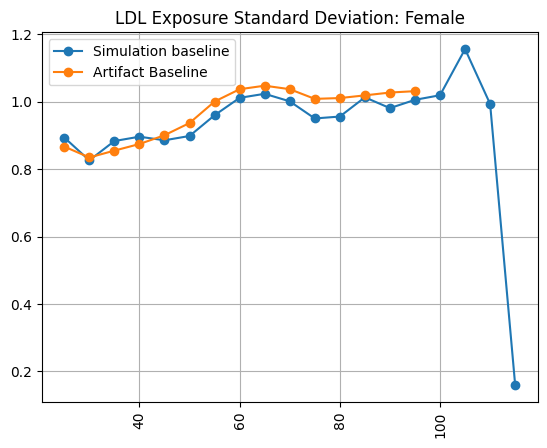

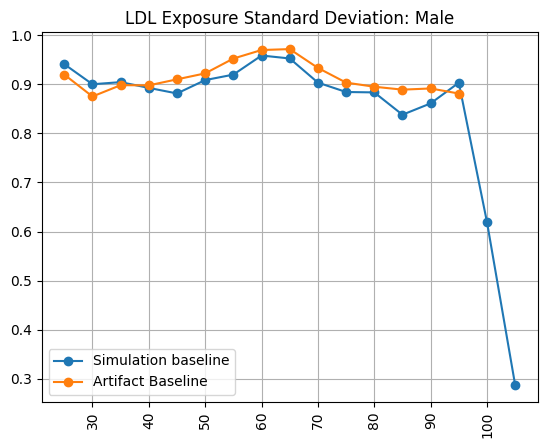

In [17]:
for sex in ldl_std.sex.unique():
    plt.figure() 
    subdata = ldl_std.loc[(ldl_std.sex==sex)]
    plt.plot(subdata['age_start'], subdata['std'], marker='o')
    subdata2 = ldl_exp_std.loc[(ldl_exp_std.sex==sex)]
    plt.plot(subdata2['age_start'], subdata2['mean'], marker='o')
    plt.title(f'LDL Exposure Standard Deviation: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.legend(['Simulation baseline', 'Artifact Baseline']) 

In [18]:
## This looks good until the oldest age groups 
## Let's check how many people are in this group to see how concerned we should be 

data1.loc[data1.age_start > 100]

,tracked,location,entrance_time,alive,age,sex,exit_time,cause_of_death,years_of_life_lost,years_lived_with_disability,...,polypill,sbp_medication_adherence,ldlc_multiplier,sbp_therapeutic_inertia_propensity,visit_type,last_fpg_test_date,scheduled_date,high_ldl,high_sbp,age_start
217,True,Alabama,2020-12-04,alive,105.749929,Female,NaT,not_dead,0.0,0.0,...,cat2,cat1,1.0000,0.310053,none,NaT,NaT,3.065407,117.839630,105.0
4700,True,Alabama,2020-12-04,alive,106.524522,Female,NaT,not_dead,0.0,0.0,...,cat2,cat3,1.0000,0.877295,none,NaT,NaT,2.883360,140.200723,105.0
6575,True,Alabama,2020-12-04,alive,108.032306,Male,NaT,not_dead,0.0,0.0,...,cat2,cat3,1.3620,0.775325,none,NaT,2021-02-10 18:35:22.647120000,2.147039,127.158067,105.0
10437,True,Alabama,2020-12-04,alive,105.020297,Male,NaT,not_dead,0.0,0.0,...,cat2,cat3,1.0000,0.239407,none,NaT,NaT,2.194296,148.891539,105.0
11816,True,Alabama,2020-12-04,alive,115.745672,Female,NaT,not_dead,0.0,0.0,...,cat2,cat3,1.3620,0.824641,none,2018-03-24 01:30:26.460179424,NaT,2.653104,158.321445,115.0
12298,True,Alabama,2020-12-04,alive,106.828701,Male,NaT,not_dead,0.0,0.0,...,cat2,cat3,1.5125,0.057388,none,NaT,NaT,2.037400,143.761766,105.0
13212,True,Alabama,2020-12-04,alive,105.872329,Female,NaT,not_dead,0.0,0.0,...,cat2,cat3,1.0000,0.695905,none,2018-06-26 17:47:20.995395968,2021-01-27 14:43:04.294214400,2.267461,103.715200,105.0
14481,True,Alabama,2020-12-04,alive,111.602746,Male,NaT,not_dead,0.0,0.0,...,cat2,cat3,1.0000,0.405285,none,NaT,NaT,2.618888,116.358751,110.0
16385,True,Alabama,2020-12-04,alive,105.115936,Female,NaT,not_dead,0.0,0.0,...,cat2,cat3,1.0000,0.316538,none,NaT,NaT,2.246279,138.086792,105.0
17889,True,Alabama,2020-12-04,alive,108.816956,Female,NaT,not_dead,0.0,0.0,...,cat2,cat3,1.0000,0.209866,none,NaT,NaT,2.686427,120.695240,105.0


In [19]:
## Not too concerned but something to watch

In [20]:
## We can repeat this for SBP 

sbp_exp_std = load_artifact_data('risk_factor', 'high_systolic_blood_pressure', 'exposure_standard_deviation')
sbp_exp_std['age_group'] = [f'{int(i)}_to_{int(j) - 1}' for (i,j) in zip(sbp_exp_std.age_start,sbp_exp_std.age_end)]
sbp_exp_std.head()

,sex,age_start,age_end,year_start,year_end,mean,35%,2.5%,97.5%,location,measure,age_group
0,Female,25.0,30.0,2019,2020,10.454106,10.374487,10.024166,10.880320,Alabama,exposure_standard_deviation,25_to_29
1,Female,30.0,35.0,2019,2020,11.315841,11.220208,10.866911,11.757483,Alabama,exposure_standard_deviation,30_to_34
2,Female,35.0,40.0,2019,2020,13.122234,13.048752,12.687791,13.516641,Alabama,exposure_standard_deviation,35_to_39
3,Female,40.0,45.0,2019,2020,14.592419,14.500977,14.094234,15.091773,Alabama,exposure_standard_deviation,40_to_44
4,Female,45.0,50.0,2019,2020,15.887863,15.800024,15.414401,16.355687,Alabama,exposure_standard_deviation,45_to_49


In [21]:
sbp_std = (data1
                .groupby(['age_start', 'sex'])
                .high_sbp.describe()
                .filter(['std'])
                .reset_index())
sbp_std.head()

,age_start,sex,std
0,25.0,Female,10.023730
1,25.0,Male,10.274873
2,30.0,Female,11.590916
3,30.0,Male,11.507340
4,35.0,Female,13.003007


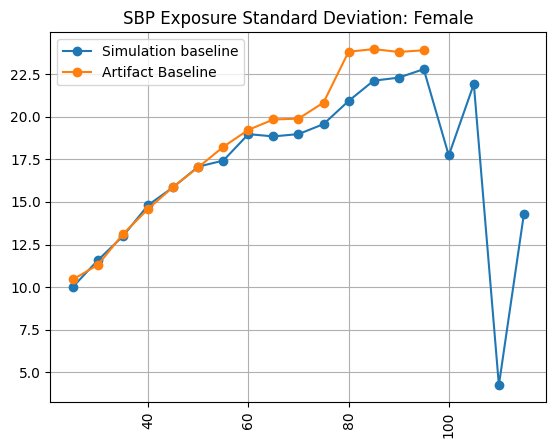

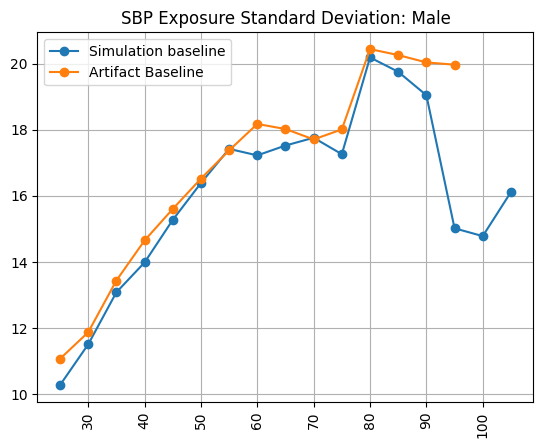

In [22]:
for sex in sbp_std.sex.unique():
    plt.figure() 
    subdata = sbp_std.loc[(sbp_std.sex==sex)]
    plt.plot(subdata['age_start'], subdata['std'], marker='o')
    subdata2 = sbp_exp_std.loc[(sbp_exp_std.sex==sex)]
    plt.plot(subdata2['age_start'], subdata2['mean'], marker='o')
    plt.title(f'SBP Exposure Standard Deviation: {sex}') 
    plt.xticks(rotation=90) 
    plt.grid()
    plt.legend(['Simulation baseline', 'Artifact Baseline']) 

In [23]:
## Similarly this only starts getting wonky in the 100+ folks which doesn't have a lot of data in it 